Bradford Silent Substitution
============================

In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import basinhopping, Bounds
from scipy.interpolate import interp1d

from silentsub.silentsub import SilentSubstitutionSolver
from silentsub.plotting import stim_plot
from silentsub.CIE import get_CIES026

sns.set_context('notebook')
sns.set_style('darkgrid')

Load data from sphere
---------------------
These are the data collected by Riccardo on 26/10/2021

In [2]:
spds = pd.read_csv('../../BradfordPupillometry/data/new/external_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))

# List of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']
spds = spds.sort_index()
spds

380           381           382           383  \
Primary Setting                                                           
0       0        1.130000e-08  1.380000e-08  2.950000e-09  0.000000e+00   
        65       8.380000e-07  1.030000e-06  1.060000e-06  7.220000e-07   
        130      1.040000e-07  1.650000e-07  1.630000e-07  9.320000e-07   
        195      2.010000e-06  3.720000e-06  5.080000e-06  5.090000e-06   
        260      7.880000e-06  7.150000e-06  9.470000e-06  7.480000e-06   
...                       ...           ...           ...           ...   
9       3835     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        3900     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        3965     4.680000e-06  5.740000e-06  1.220000e-06  0.000000e+00   
        4030     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
        4095     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                          384       385           386           387  \
Primary Setting                                                       
0       0        0.000000e+00  0.000000  8.260000e-09  2.690000e-08   
        65       3.670000e-07  0.000001  1.420000e-06  8.830000e-07   
        130      1.810000e-06  0.000001  7.400000e-07  1.070000e-06   
        195      4.440000e-06  0.000002  8.720000e-07  2.830000e-06   
        260      4.410000e-06  0.000006  6.440000e-06  5.980000e-06   
...                       ...       ...           ...           ...   
9       3835     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
        3900     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
        3965     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
        4030     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
        4095     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   

                          388           389  ...           771           772  \
Primary Setting                              ...                               
0       0        1.590000e-08  0.000000e+00  ...  1.790000e-06  1.580000e-06   
        65       6.230000e-07  5.090000e-07  ...  2.330000e-06  2.120000e-06   
        130      2.290000e-06  3.790000e-06  ...  1.550000e-06  2.350000e-06   
        195      3.750000e-06  4.420000e-06  ...  1.270000e-06  4.490000e-06   
        260      9.800000e-06  1.360000e-05  ...  6.160000e-06  3.080000e-06   
...                       ...           ...  ...           ...           ...   
9       3835     2.880000e-06  5.450000e-06  ...  0.000000e+00  0.000000e+00   
        3900     0.000000e+00  0.000000e+00  ...  3.540000e-06  9.460000e-07   
        3965     2.950000e-06  5.590000e-06  ...  5.180000e-07  3.260000e-06   
        4030     0.000000e+00  0.000000e+00  ...  4.790000e-05  1.280000e-05   
        4095     0.000000e+00  4.850000e-07  ...  5.250000e-07  3.300000e-06   

                      773           774       775       776           777  \
Primary Setting                                                             
0       0        0.000001  1.360000e-06  0.000002  0.000001  9.370000e-07   
        65       0.000002  2.020000e-06  0.000002  0.000002  1.250000e-06   
        130      0.000002  8.770000e-07  0.000002  0.000003  1.590000e-06   
        195      0.000004  2.610000e-06  0.000004  0.000004  3.600000e-06   
        260      0.000002  2.210000e-06  0.000005  0.000005  1.810000e-06   
...                   ...           ...       ...       ...           ...   
9       3835     0.000026  6.520000e-05  0.000093  0.000074  1.120000e-05   
        3900     0.000000  0.000000e+00  0.000000  0.000008  2.450000e-05   
        3965     0.000003  0.000000e+00  0.000000  0.000000  0.000000e+00   
        4030     0.000012  2.870000e-05  0.000009  0.000001  4.250000e-06   
        4095     0.000003  0.000000e+00  0.000000  0.000000  0.000000e+00   

                          778       779       780  
Primary Setting                

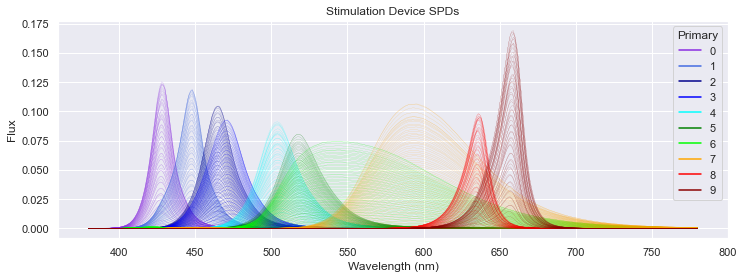

In [3]:
# Instantiate the class / define the problem
ss = SilentSubstitutionSolver(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1,
    ignore=['R'],
    silence=['S', 'M', 'L'],
    isolate=['I'],
    background=None
)

_ = ss.plot_spds()

basinhopping step 0: f 8.27159


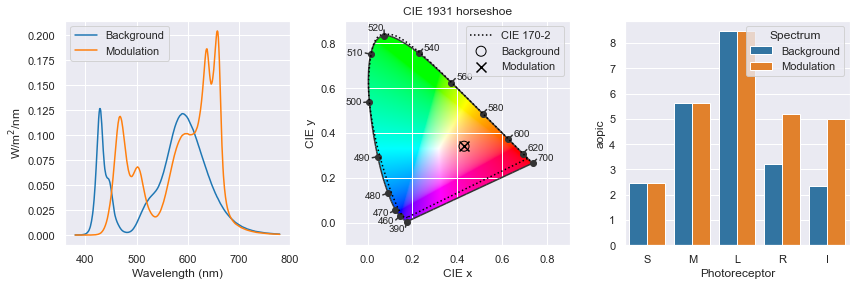

	xy: [  2.68456653e-06  -9.82479681e-07]
	luminance: 0.00015748508611456506
	silence: 5.1548204173050956e-11
basinhopping step 1: f 5.86578 trial_f 5.86578 accepted 1  lowest_f 5.86578
found new global minimum on step 1 with function value 5.86578


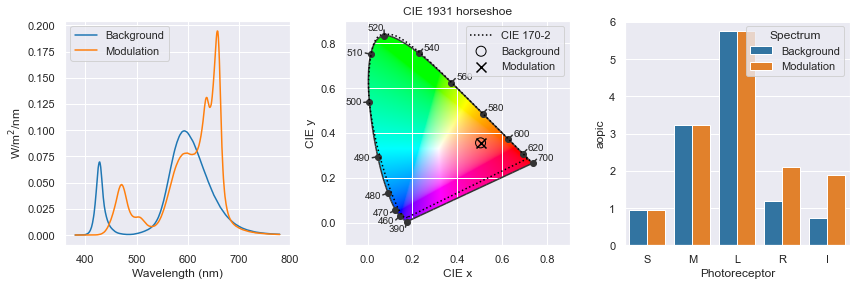

	xy: [ -3.58484740e-06   9.38260543e-07]
	luminance: 0.000753824802740445
	silence: 1.9079854670302306e-10
basinhopping step 2: f 5.19931 trial_f 5.19931 accepted 1  lowest_f 5.19931
found new global minimum on step 2 with function value 5.19931


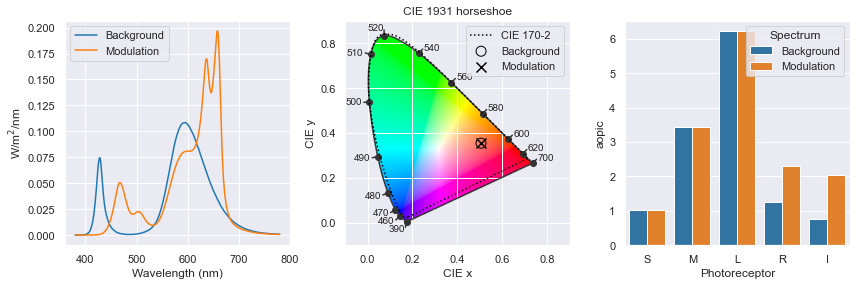

	xy: [  9.87106869e-07   3.91265806e-07]
	luminance: 0.0016319746706026771
	silence: 2.109518090404225e-10
basinhopping step 3: f 5.19931 trial_f 7.78498 accepted 0  lowest_f 5.19931


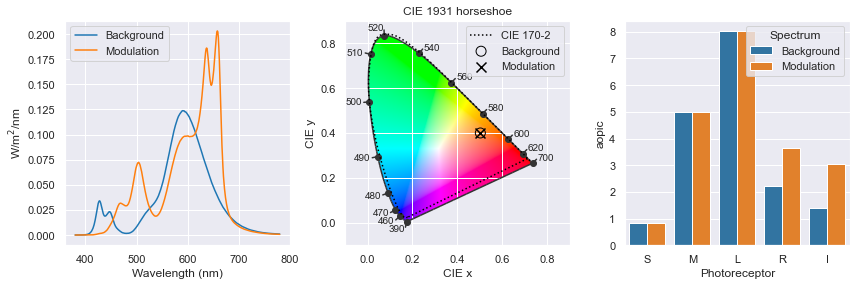

	xy: [ 0.00014015 -0.00010755]
	luminance: 0.8549592802103692
	silence: 1.798407870184587e-07
basinhopping step 4: f 5.19931 trial_f 9.12397 accepted 0  lowest_f 5.19931


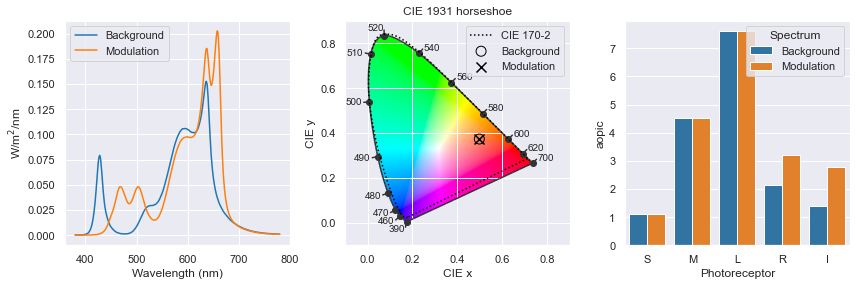

	xy: [  7.30777071e-05  -4.79468700e-05]
	luminance: 0.1511992263618394
	silence: 4.987730947920111e-08
basinhopping step 5: f 5.19931 trial_f 8.21964 accepted 0  lowest_f 5.19931


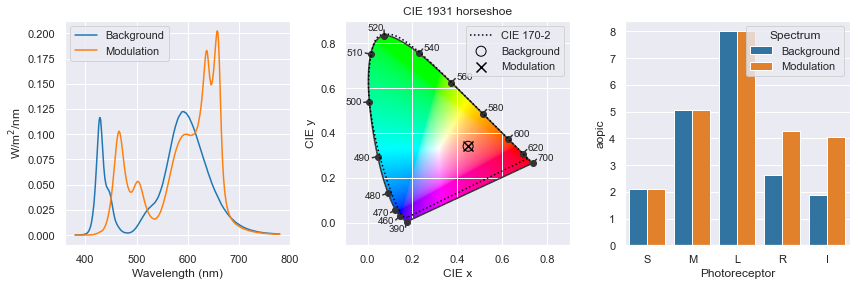

	xy: [  7.41120760e-06  -3.88341965e-06]
	luminance: 0.0007701173121460053
	silence: 4.797819536356708e-10
basinhopping step 6: f 5.13231 trial_f 5.13231 accepted 1  lowest_f 5.13231
found new global minimum on step 6 with function value 5.13231


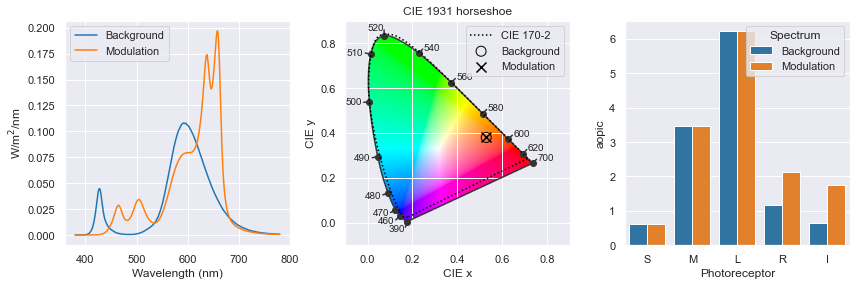

	xy: [  1.23217281e-06  -7.76605888e-07]
	luminance: 5.527684423445808e-05
	silence: 1.626434577887359e-11
basinhopping step 7: f 5.13231 trial_f 8.03365 accepted 0  lowest_f 5.13231


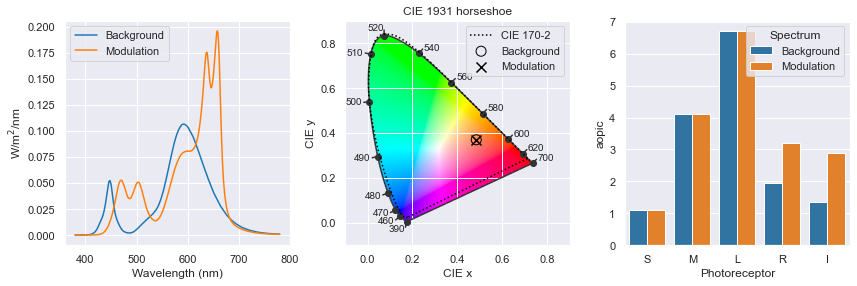

	xy: [  1.20115234e-05  -7.52534536e-06]
	luminance: 0.0001241856294165313
	silence: 1.9236094941521263e-09
basinhopping step 8: f 5.13231 trial_f 7.69635 accepted 0  lowest_f 5.13231


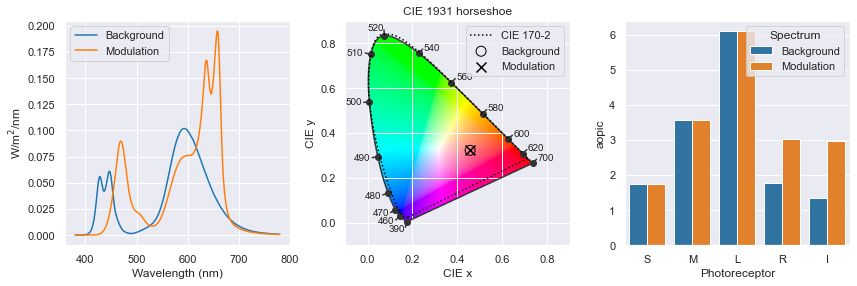

	xy: [  1.33559229e-05  -1.46050735e-06]
	luminance: 0.01681817982208655
	silence: 2.2746471679781574e-09
basinhopping step 9: f 5.13231 trial_f 9.94998 accepted 0  lowest_f 5.13231


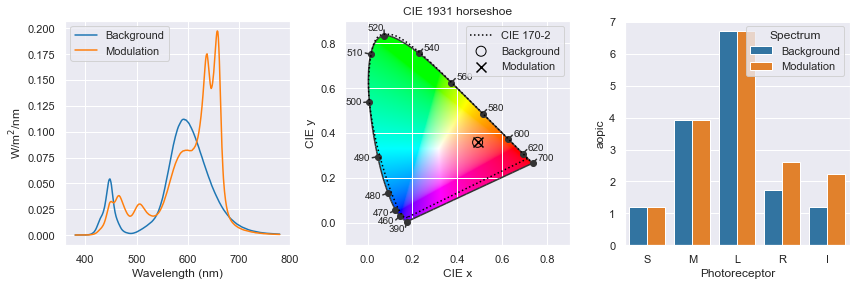

	xy: [  3.81663632e-05  -7.76654490e-06]
	luminance: 0.2445865922119511
	silence: 2.6270009577700947e-08
basinhopping step 10: f 4.41362 trial_f 4.41362 accepted 1  lowest_f 4.41362
found new global minimum on step 10 with function value 4.41362


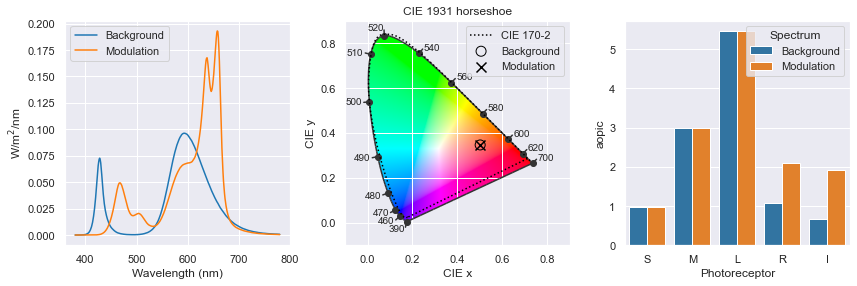

	xy: [  3.82738276e-06  -7.09035637e-07]
	luminance: 0.0013858667980876315
	silence: 2.565181702650856e-10
basinhopping step 11: f 4.41362 trial_f 8.70908 accepted 0  lowest_f 4.41362


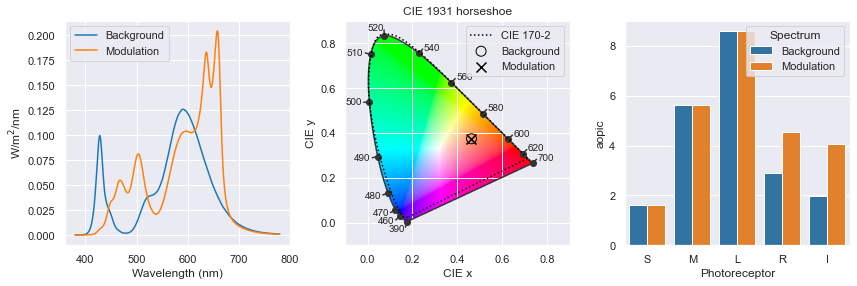

	xy: [ -4.86310677e-05   3.48295822e-05]
	luminance: 0.07266646358984348
	silence: 2.278723436924064e-08
basinhopping step 12: f 4.41362 trial_f 9.61377 accepted 0  lowest_f 4.41362


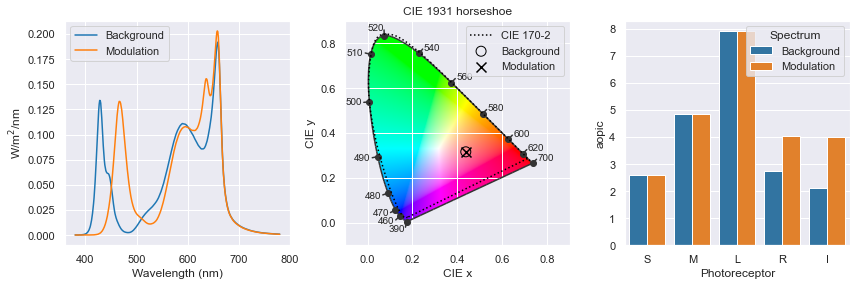

	xy: [  2.88716331e-06  -6.76537685e-07]
	luminance: 0.0001745797248940257
	silence: 2.1336749319899192e-10
basinhopping step 13: f 4.41362 trial_f 9.60253 accepted 0  lowest_f 4.41362


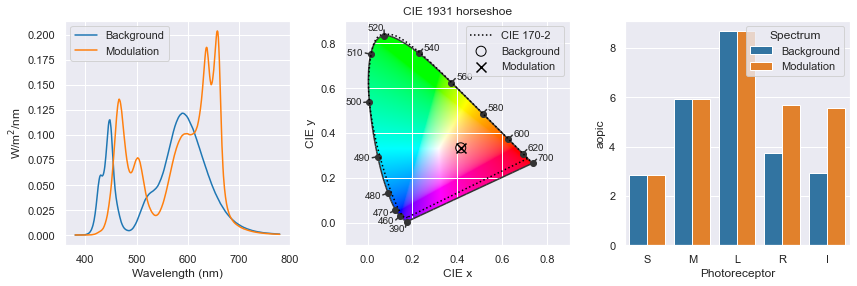

	xy: [  4.28080987e-06  -2.35289100e-07]
	luminance: 0.0029208625570239046
	silence: 2.0156838955813645e-10
basinhopping step 14: f 5.60556 trial_f 5.60556 accepted 1  lowest_f 4.41362


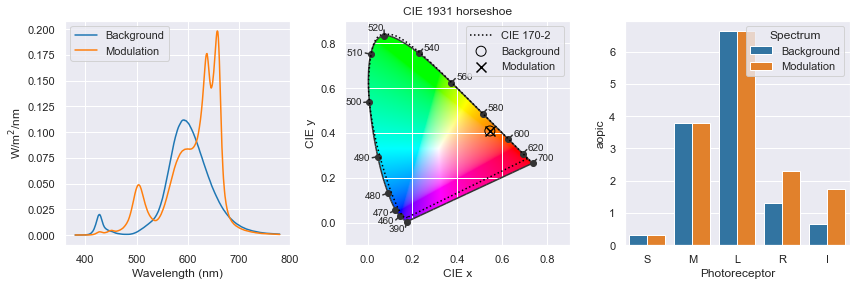

	xy: [  1.42597313e-05  -1.20457077e-05]
	luminance: 0.0028124178882788817
	silence: 2.1453836475325647e-09
basinhopping step 15: f 8.36689 trial_f 8.36689 accepted 1  lowest_f 4.41362


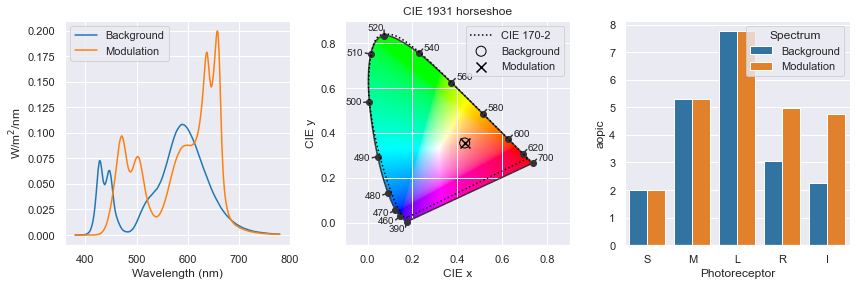

	xy: [  6.19066868e-06  -4.16747605e-06]
	luminance: 0.01255674696022435
	silence: 2.3867336723476255e-09
basinhopping step 16: f 9.02759 trial_f 9.02759 accepted 1  lowest_f 4.41362


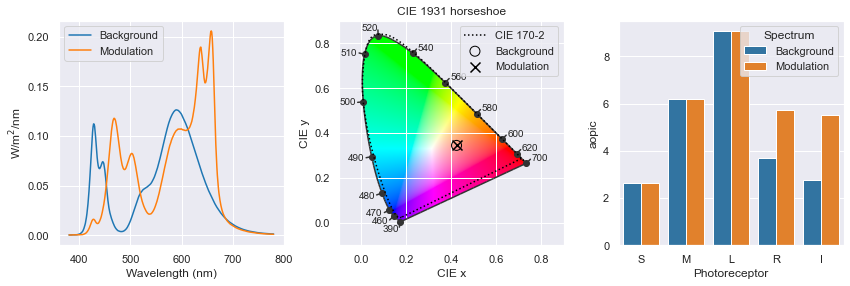

	xy: [  4.73623494e-06   6.39182696e-07]
	luminance: 0.010353621698869128
	silence: 5.616387178937249e-10
basinhopping step 17: f 9.57412 trial_f 9.57412 accepted 1  lowest_f 4.41362


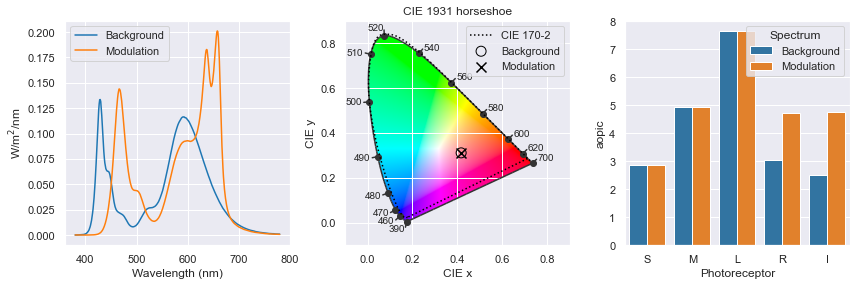

	xy: [  1.45981524e-04  -5.43742564e-05]
	luminance: 0.41369737588639344
	silence: 1.7657111057026414e-07
basinhopping step 18: f 8.18814 trial_f 8.18814 accepted 1  lowest_f 4.41362


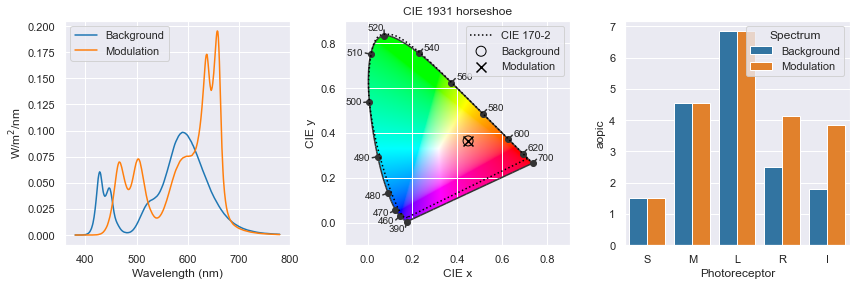

	xy: [  2.49842210e-05  -8.64821516e-06]
	luminance: 0.02399193984643193
	silence: 4.671827893582552e-09
basinhopping step 19: f 9.38594 trial_f 9.38594 accepted 1  lowest_f 4.41362


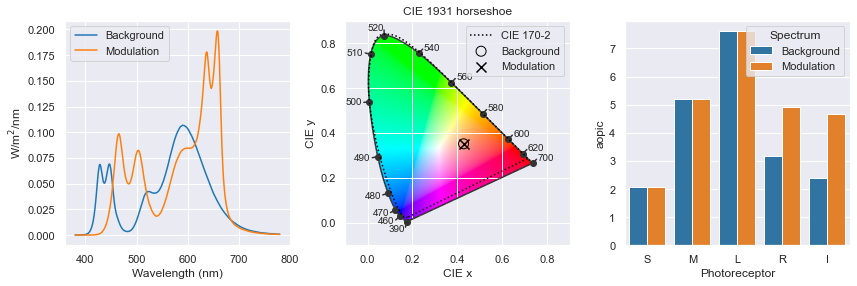

	xy: [  4.56757064e-06  -2.23076154e-06]
	luminance: 0.001630088042310446
	silence: 1.927572697063209e-10
basinhopping step 20: f 9.38594 trial_f 10.4415 accepted 0  lowest_f 4.41362


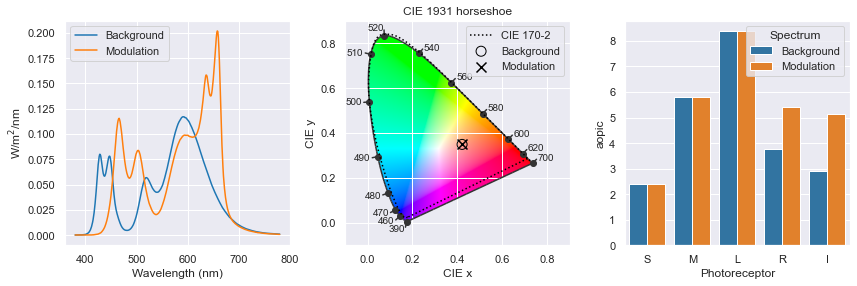

	xy: [  2.26539189e-05  -8.43461665e-06]
	luminance: 0.049723148761044306
	silence: 4.078679894913812e-09
basinhopping step 21: f 8.88483 trial_f 8.88483 accepted 1  lowest_f 4.41362


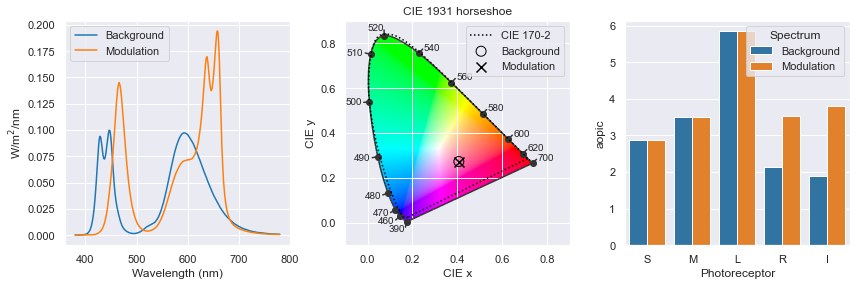

	xy: [  1.57602375e-06  -3.09091018e-07]
	luminance: 1.79879849469161e-06
	silence: 3.371669022001031e-11
basinhopping step 22: f 7.55923 trial_f 7.55923 accepted 1  lowest_f 4.41362


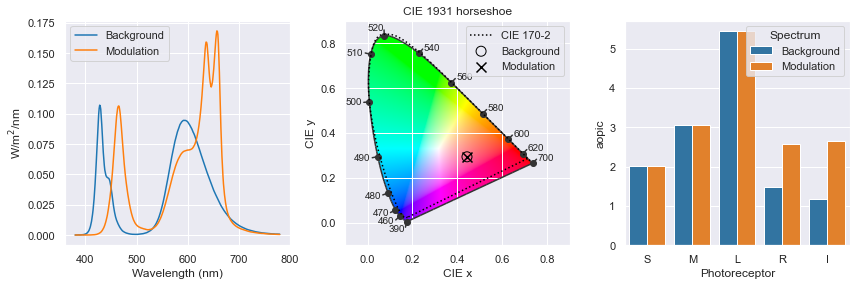

	xy: [  2.09858258e-06  -8.65192188e-07]
	luminance: 3.897633178210601e-05
	silence: 5.5753307870106004e-11
basinhopping step 23: f 8.71096 trial_f 8.71096 accepted 1  lowest_f 4.41362


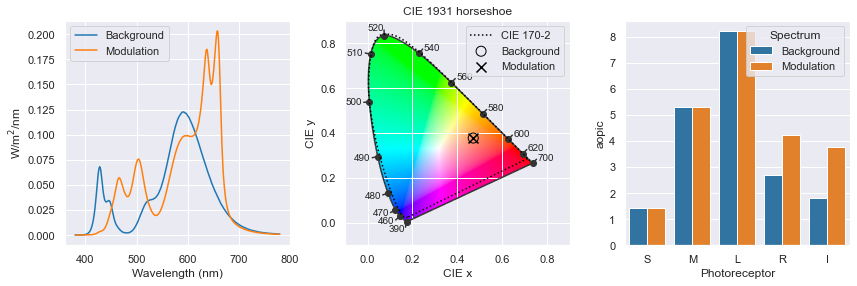

	xy: [  1.94786739e-05  -7.60040332e-06]
	luminance: 0.03579094547091834
	silence: 3.430497811601517e-09
basinhopping step 24: f 8.3727 trial_f 8.3727 accepted 1  lowest_f 4.41362


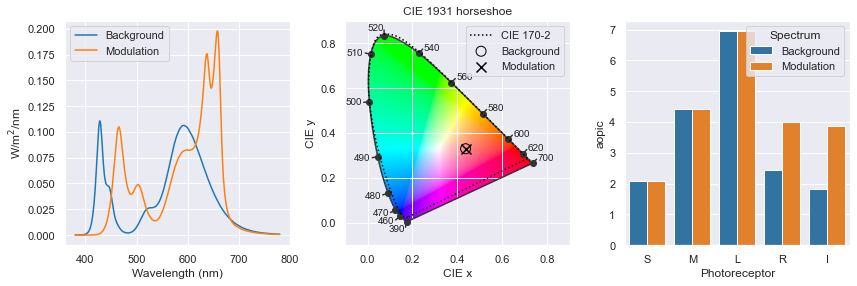

	xy: [  1.74191031e-05  -1.15986583e-05]
	luminance: 0.00015401768043899755
	silence: 3.9917611464654236e-09
basinhopping step 25: f 8.3727 trial_f 9.44371 accepted 0  lowest_f 4.41362


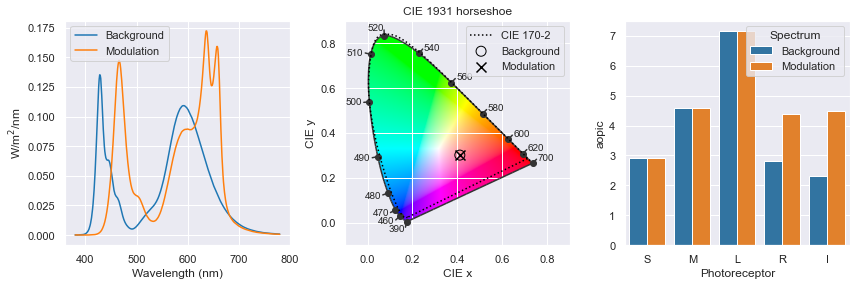

	xy: [  5.84146841e-06   1.05491372e-06]
	luminance: 0.0031550103070064625
	silence: 4.953017374480717e-10
basinhopping step 26: f 7.67612 trial_f 7.67612 accepted 1  lowest_f 4.41362


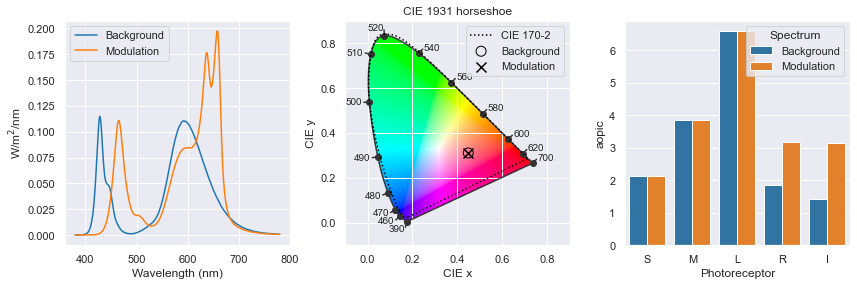

	xy: [  1.09683066e-06  -8.67156468e-07]
	luminance: 7.649189726012628e-06
	silence: 3.194369314142969e-11
basinhopping step 27: f 7.67612 trial_f 9.02453 accepted 0  lowest_f 4.41362


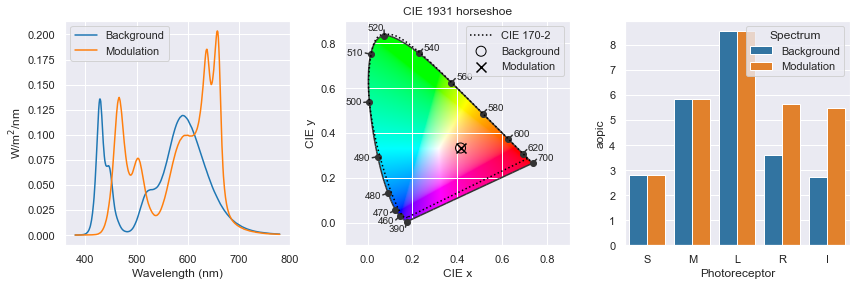

	xy: [  1.83348653e-06  -6.61237945e-07]
	luminance: 0.00012791821994744153
	silence: 2.2519028363341522e-11
basinhopping step 28: f 7.8852 trial_f 7.8852 accepted 1  lowest_f 4.41362


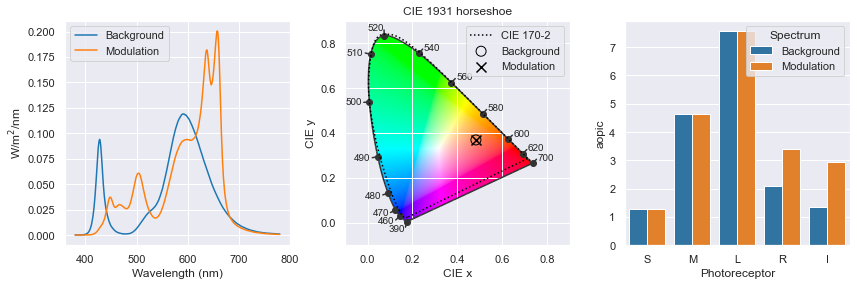

	xy: [  8.02828121e-06   2.08910193e-06]
	luminance: 0.019993538969161152
	silence: 3.37306876318885e-09
basinhopping step 29: f 7.8852 trial_f 11.1182 accepted 0  lowest_f 4.41362


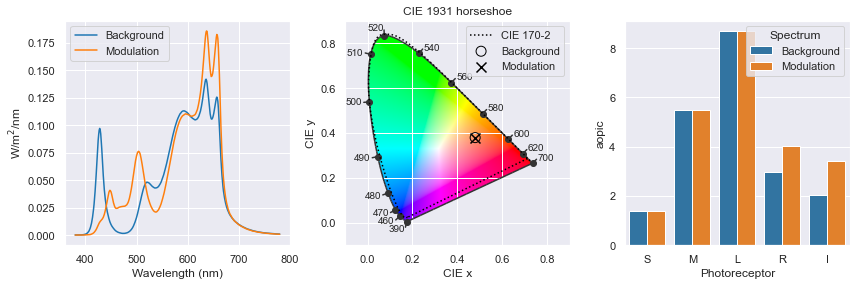

	xy: [  6.52599859e-05  -2.98792829e-05]
	luminance: 2.7264238158212564
	silence: 1.6448877756370108e-07
basinhopping step 30: f 6.14842 trial_f 6.14842 accepted 1  lowest_f 4.41362


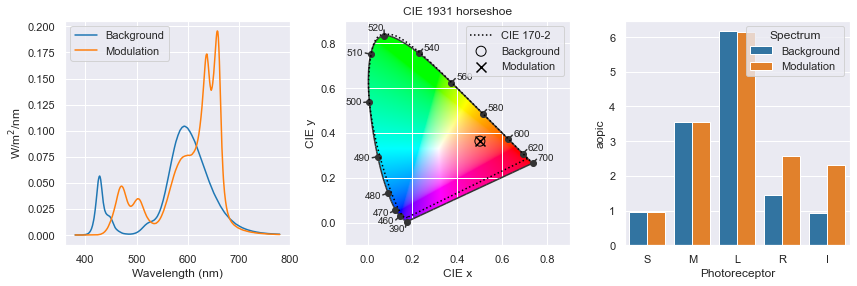

	xy: [  1.77726575e-04  -5.89474281e-05]
	luminance: 2.7454532895025654
	silence: 4.238189021362777e-07
basinhopping step 31: f 6.14842 trial_f 10.689 accepted 0  lowest_f 4.41362


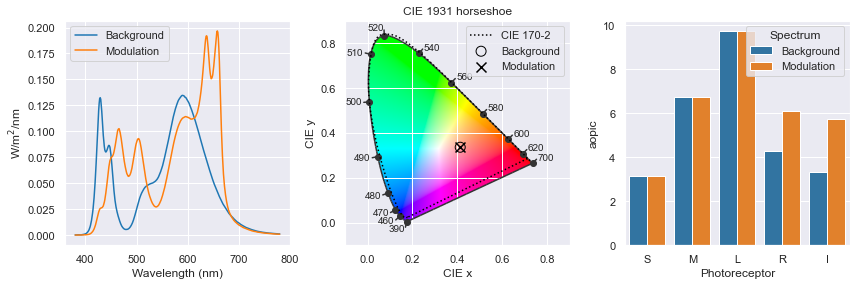

	xy: [  5.67633606e-05  -4.82225271e-05]
	luminance: 0.11261271997874171
	silence: 5.981983723175594e-08
basinhopping step 32: f 6.14842 trial_f 9.25488 accepted 0  lowest_f 4.41362


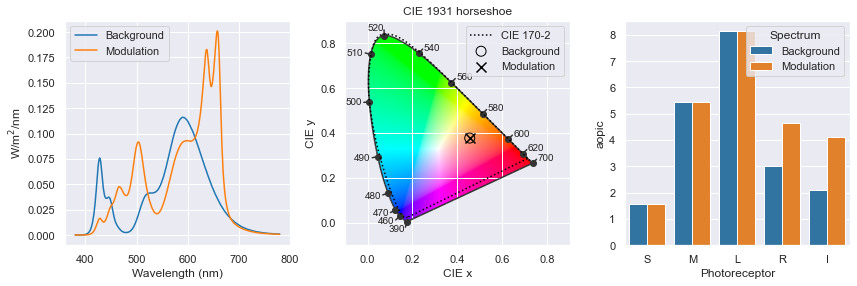

	xy: [  5.26218943e-06  -4.01073791e-06]
	luminance: 0.0014052670062782615
	silence: 3.3981712264042934e-10
basinhopping step 33: f 6.14842 trial_f 7.87571 accepted 0  lowest_f 4.41362


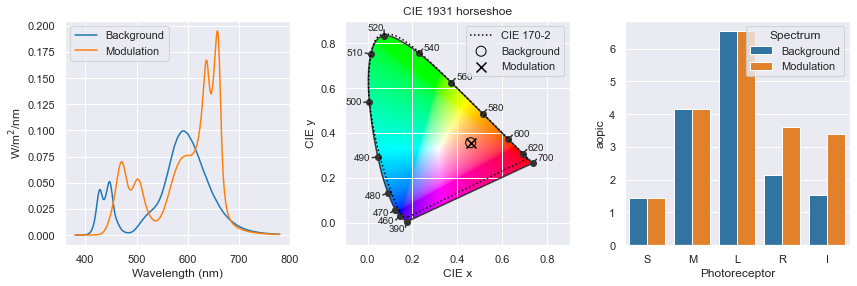

	xy: [  7.96148653e-07  -3.99946906e-07]
	luminance: 1.2305178438031317e-05
	silence: 4.818670386601315e-12
basinhopping step 34: f 5.22349 trial_f 5.22349 accepted 1  lowest_f 4.41362


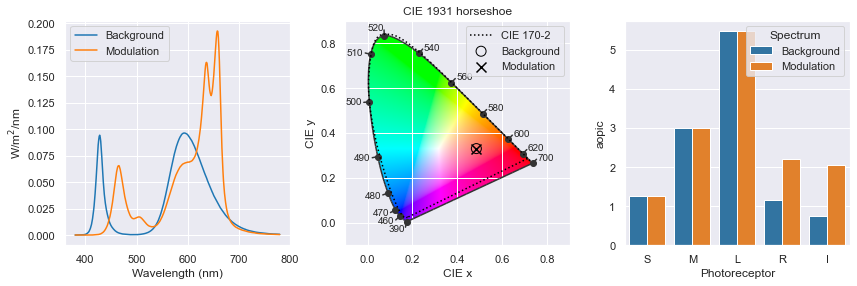

	xy: [  4.19430219e-06  -2.83842460e-07]
	luminance: 0.003671001343243552
	silence: 5.136185062078275e-10
basinhopping step 35: f 5.22349 trial_f 9.51113 accepted 0  lowest_f 4.41362


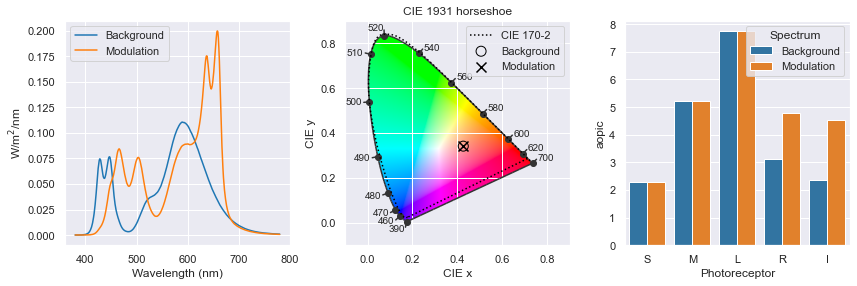

	xy: [  1.07283613e-05  -7.49352566e-06]
	luminance: 0.007277960923608042
	silence: 1.771530003293104e-09
basinhopping step 36: f 5.22349 trial_f 13.6053 accepted 0  lowest_f 4.41362


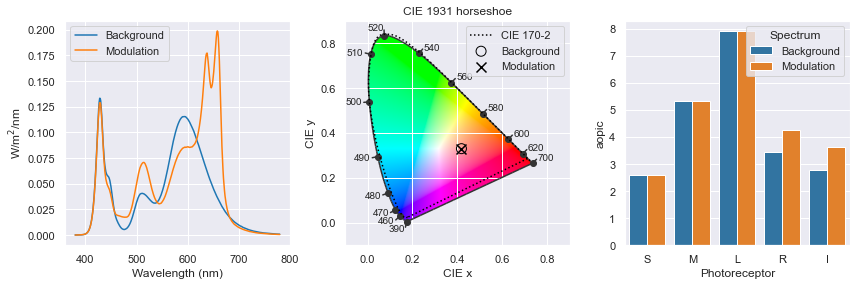

	xy: [  6.32529776e-05  -2.63940660e-05]
	luminance: 0.9037830626010533
	silence: 7.826001106977283e-08
basinhopping step 37: f 5.22349 trial_f 6.46159 accepted 0  lowest_f 4.41362


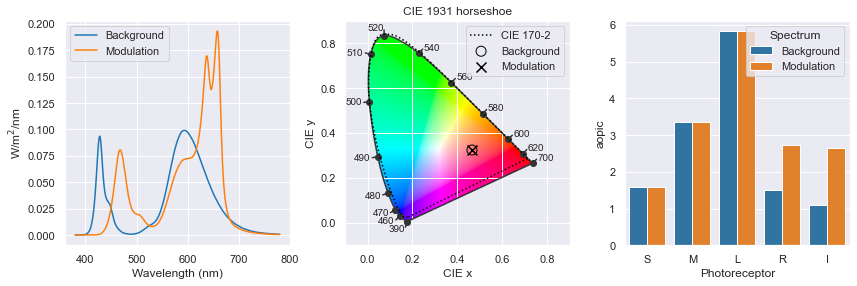

	xy: [  9.14314186e-07  -1.01682856e-06]
	luminance: 1.2011377631818433e-05
	silence: 3.945435070067181e-11
basinhopping step 38: f 5.22349 trial_f 6.79744 accepted 0  lowest_f 4.41362


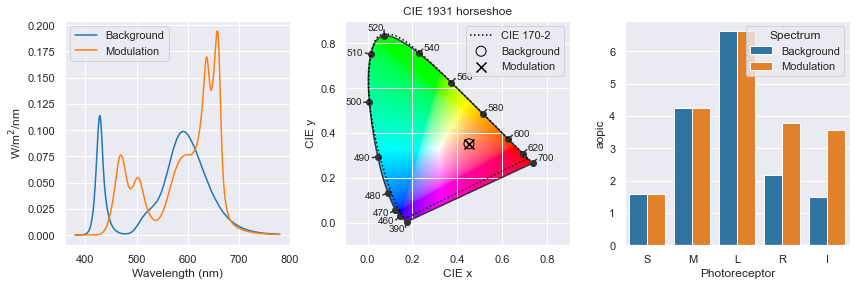

	xy: [  7.20435135e-05  -5.48814836e-05]
	luminance: 0.17373860781154843
	silence: 8.147794851897299e-08
basinhopping step 39: f 5.22349 trial_f 7.93117 accepted 0  lowest_f 4.41362


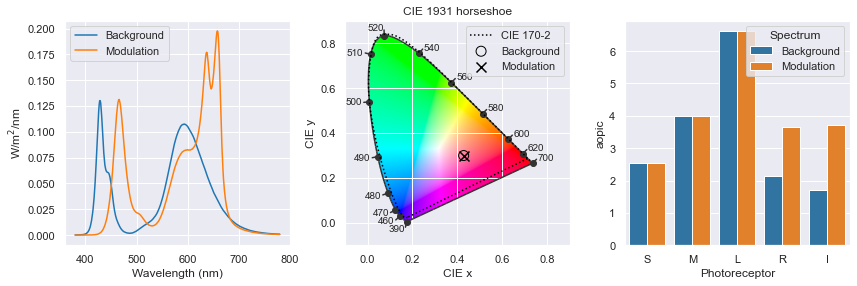

	xy: [  5.11521495e-06  -8.91281961e-07]
	luminance: 0.0012801509157726234
	silence: 2.3505883667356794e-10
basinhopping step 40: f 9.44391 trial_f 9.44391 accepted 1  lowest_f 4.41362


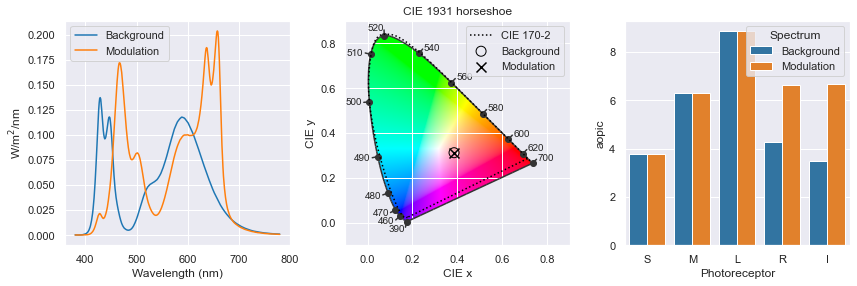

	xy: [  5.37272207e-06  -1.56485459e-06]
	luminance: 0.0003745084905183896
	silence: 2.0432977047051115e-10
basinhopping step 41: f 9.44391 trial_f 13.4073 accepted 0  lowest_f 4.41362


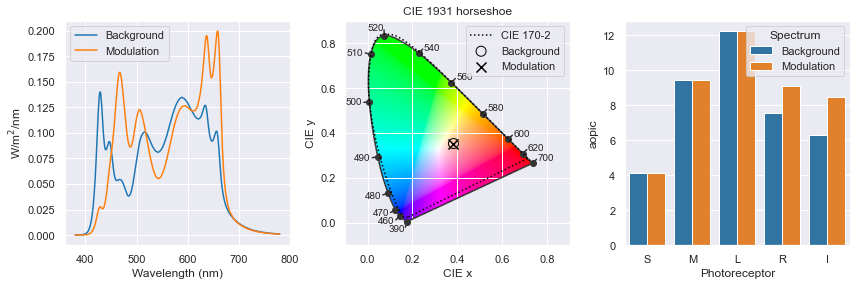

	xy: [  5.46243370e-06  -5.60080617e-07]
	luminance: 0.0068388354859263345
	silence: 2.52010470943979e-10
basinhopping step 42: f 10.629 trial_f 10.629 accepted 1  lowest_f 4.41362


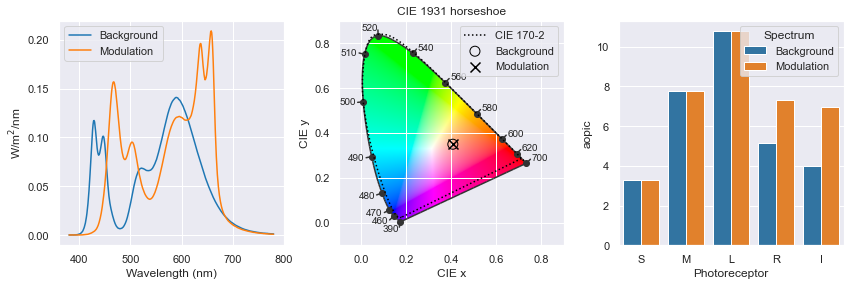

	xy: [  5.78286282e-07  -2.74195668e-07]
	luminance: 2.1101134979166645e-05
	silence: 2.1495767324421108e-12
basinhopping step 43: f 10.629 trial_f 11.6685 accepted 0  lowest_f 4.41362


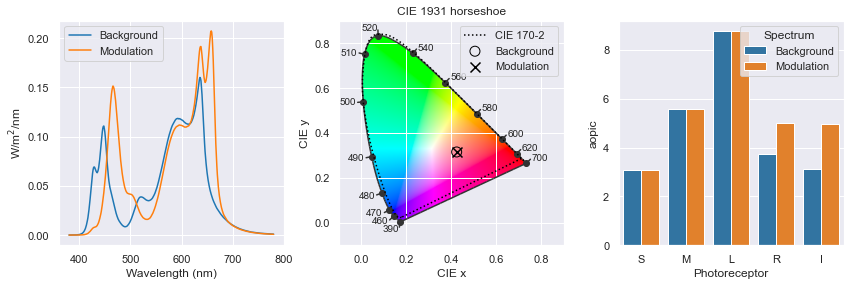

	xy: [  1.95449732e-06  -1.55558773e-06]
	luminance: 9.908341101757298e-05
	silence: 7.836948355168497e-11
basinhopping step 44: f 9.25404 trial_f 9.25404 accepted 1  lowest_f 4.41362


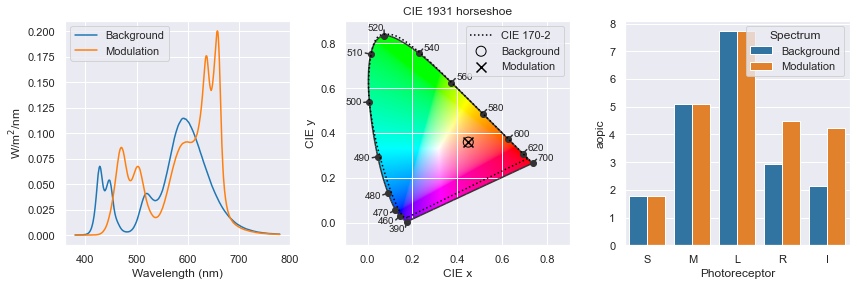

	xy: [  2.90364770e-06  -1.25501194e-06]
	luminance: 0.003028727945589095
	silence: 2.446603332870474e-10
basinhopping step 45: f 9.16993 trial_f 9.16993 accepted 1  lowest_f 4.41362


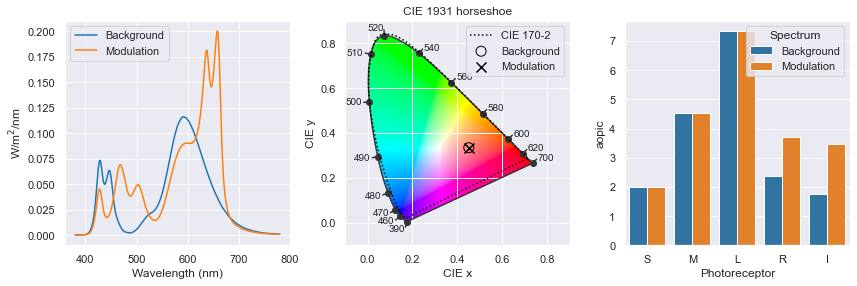

	xy: [  8.02446167e-06   8.53972343e-08]
	luminance: 0.003479295615148799
	silence: 9.99431272928057e-10
basinhopping step 46: f 9.22177 trial_f 9.22177 accepted 1  lowest_f 4.41362


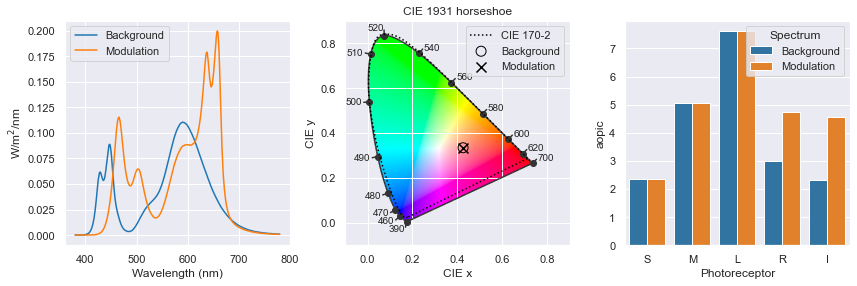

	xy: [  1.28997205e-05  -8.52954244e-06]
	luminance: 0.0004036845255340749
	silence: 2.227901815231987e-09
basinhopping step 47: f 9.22177 trial_f 10.4941 accepted 0  lowest_f 4.41362


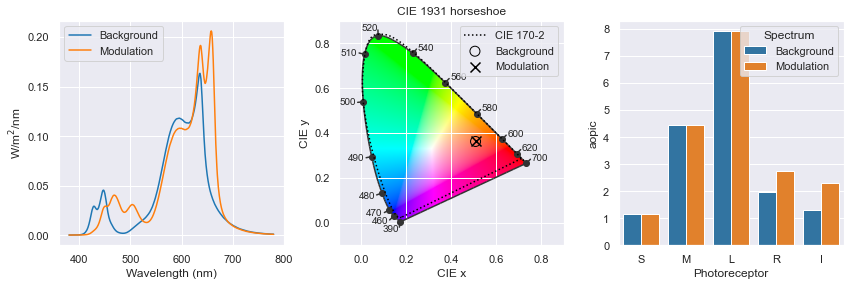

	xy: [  2.65209385e-07   1.51100912e-06]
	luminance: 0.00024055204446583306
	silence: 2.547935945909806e-10
basinhopping step 48: f 7.64044 trial_f 7.64044 accepted 1  lowest_f 4.41362


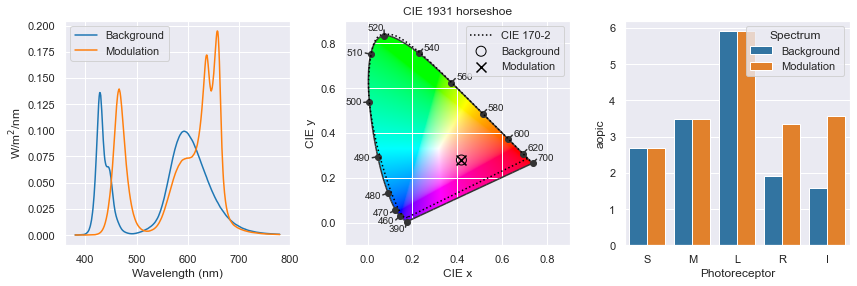

	xy: [  2.98449093e-06  -7.37634342e-07]
	luminance: 0.00014041015039259266
	silence: 9.147041378229877e-11
basinhopping step 49: f 7.64044 trial_f 8.72355 accepted 0  lowest_f 4.41362


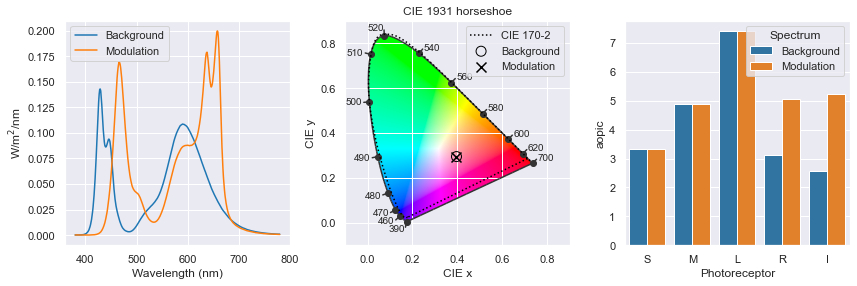

	xy: [  4.99654313e-07  -2.70171126e-08]
	luminance: 4.1365182085298175e-06
	silence: 2.4447424858189414e-12
adaptive stepsize: acceptance rate 0.480000 target 0.500000 new stepsize 0.45 old stepsize 0.5
basinhopping step 50: f 7.89605 trial_f 7.89605 accepted 1  lowest_f 4.41362


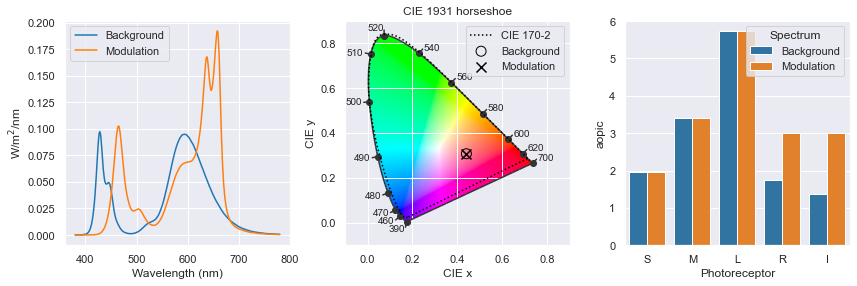

	xy: [  6.89772993e-06  -1.49092462e-06]
	luminance: 0.001690001346904458
	silence: 4.318857179796808e-10
basinhopping step 51: f 7.89605 trial_f 10.7297 accepted 0  lowest_f 4.41362


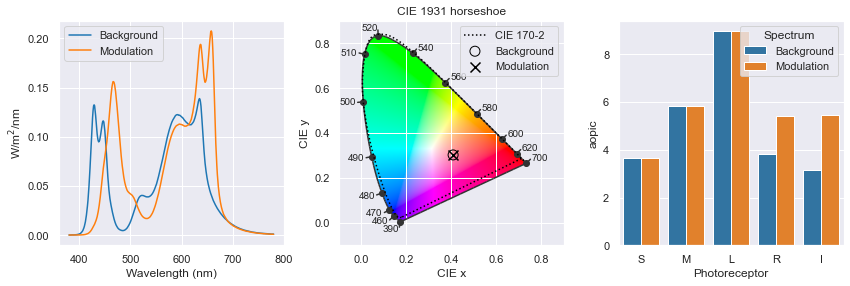

	xy: [ -5.33198249e-07  -1.09600100e-07]
	luminance: 6.107176412445262e-05
	silence: 4.558437651600704e-12
basinhopping step 52: f 7.89605 trial_f 12.9028 accepted 0  lowest_f 4.41362


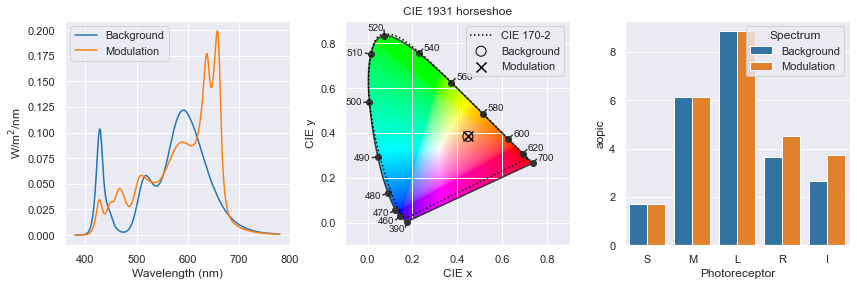

	xy: [ -3.27980436e-06   1.90102476e-06]
	luminance: 0.014073542077836084
	silence: 1.0433179110279771e-09
basinhopping step 53: f 5.82206 trial_f 5.82206 accepted 1  lowest_f 4.41362


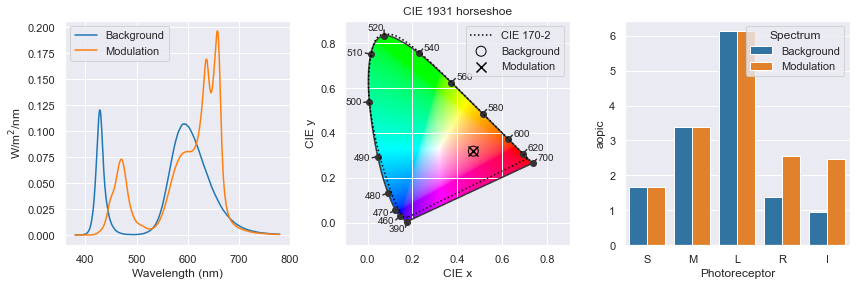

	xy: [  5.23683758e-06  -1.56756947e-06]
	luminance: 0.00013629714730720223
	silence: 3.566455327218066e-10
basinhopping step 54: f 5.82206 trial_f 9.60203 accepted 0  lowest_f 4.41362


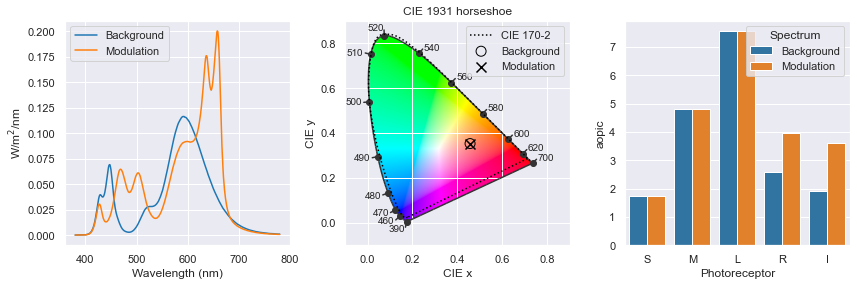

	xy: [ -7.99911836e-06  -3.34754706e-08]
	luminance: 0.011805018776499305
	silence: 1.215566668823481e-09
basinhopping step 55: f 6.48464 trial_f 6.48464 accepted 1  lowest_f 4.41362


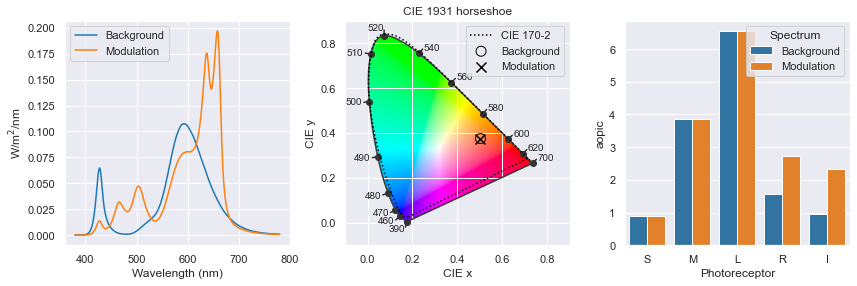

	xy: [  9.60573315e-06  -7.00144217e-06]
	luminance: 0.0007498846340594903
	silence: 9.998691466109628e-10
basinhopping step 56: f 6.48464 trial_f 8.99577 accepted 0  lowest_f 4.41362


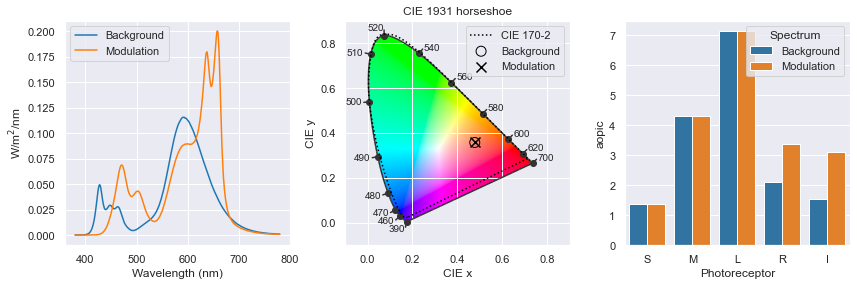

	xy: [  1.50611578e-05  -6.29726762e-06]
	luminance: 0.0022893681222632247
	silence: 2.317213282808999e-09
basinhopping step 57: f 5.93943 trial_f 5.93943 accepted 1  lowest_f 4.41362


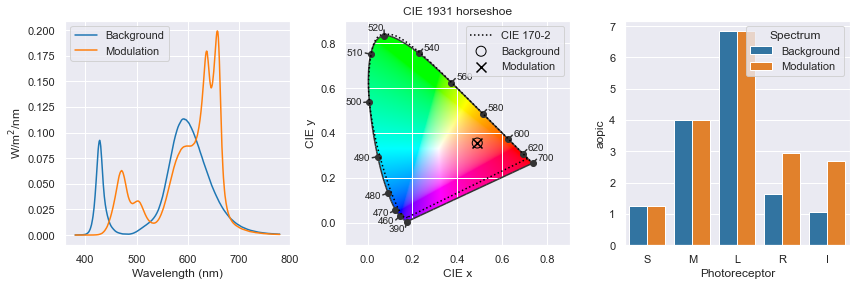

	xy: [  2.10188443e-06  -1.34157161e-06]
	luminance: 0.00013713710594423072
	silence: 4.888003327324053e-11
basinhopping step 58: f 5.93943 trial_f 9.6966 accepted 0  lowest_f 4.41362


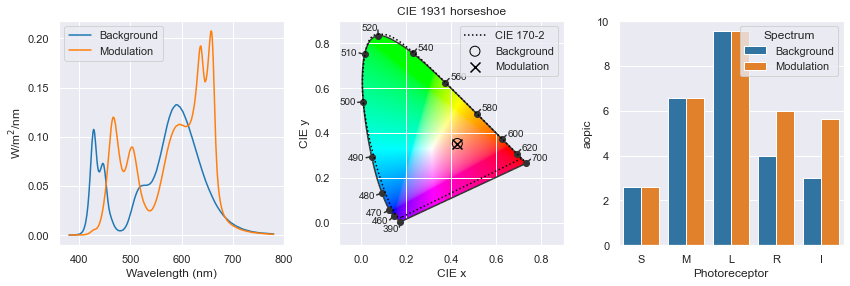

	xy: [  6.27173036e-06  -1.33570214e-06]
	luminance: 0.0283742731611888
	silence: 1.326085744551905e-09
basinhopping step 59: f 5.93943 trial_f 7.25646 accepted 0  lowest_f 4.41362


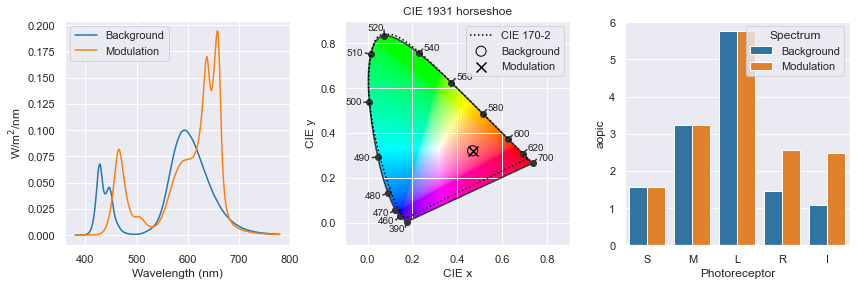

	xy: [  1.71406563e-06  -5.05735296e-07]
	luminance: 3.399488460700843e-07
	silence: 5.3271402751178704e-11
basinhopping step 60: f 5.12951 trial_f 5.12951 accepted 1  lowest_f 4.41362


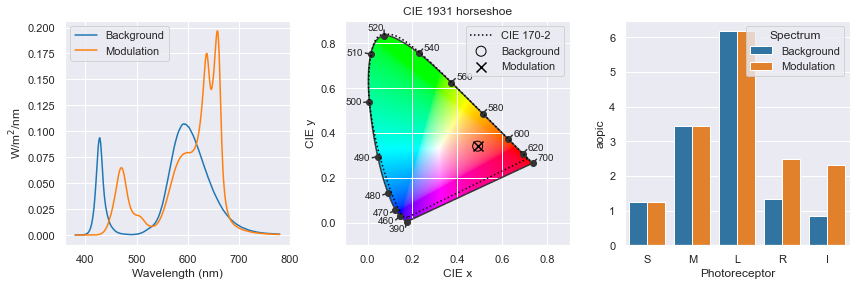

	xy: [  2.48689474e-06  -1.73297675e-06]
	luminance: 0.0006341940943634679
	silence: 1.547472024872929e-10
basinhopping step 61: f 5.12951 trial_f 9.12223 accepted 0  lowest_f 4.41362


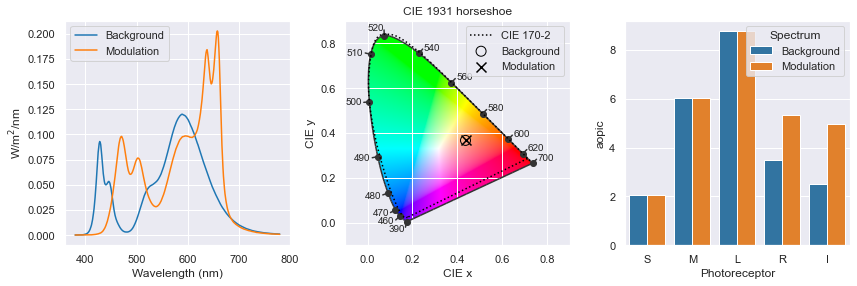

	xy: [  1.66087076e-05  -1.88136791e-06]
	luminance: 0.10419886298871438
	silence: 5.553015944638152e-09
basinhopping step 62: f 5.12951 trial_f 8.35242 accepted 0  lowest_f 4.41362


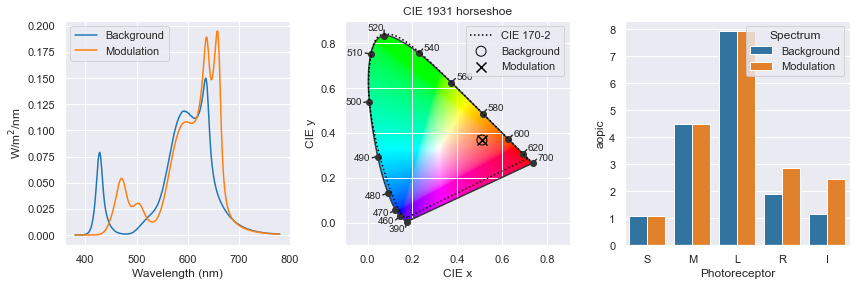

	xy: [  5.39770798e-07  -2.29612594e-07]
	luminance: 2.2691908770616586e-05
	silence: 3.442624624700325e-12


KeyboardInterrupt: 

In [4]:
# Find a solution
#solutions = []
#for i in range(10):
result = ss.find_modulation_spectra(
    target_contrast=4.,
    tollerance=.01
)
#solutions.append(result)

In [ ]:
def plot_solution(background, modulation, ax=None):
    df = (
        pd.concat([background, modulation], axis=1)
        .T.melt(
            value_name='aopic',
            var_name='Photoreceptor',
            ignore_index=False)
        .reset_index()
        .rename(
            columns={'index': 'Spectrum'})
         )
    sns.barplot(data=df, x='Photoreceptor', y='aopic', hue='Spectrum', ax=ax)
    
    
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

bg_ao = ss.predict_multiprimary_aopic(result.x[0:10], name='Background')
mod_ao = ss.predict_multiprimary_aopic(result.x[10:20], name='Modulation')

bg_spd = ss.predict_multiprimary_spd(result.x[0:10], name='Background')
mod_spd = ss.predict_multiprimary_spd(result.x[10:20], name='Modulation')

plot_solution(bg_ao.T.squeeze(), mod_ao.T.squeeze(), ax=axs[0])

bg_spd.T.plot(ax=axs[1])
mod_spd.T.plot(ax=axs[1])

In [ ]:
print(f'The background settings are {ss.weights_to_settings(result.x[0:10])}')
print(f'The modulation settings are {ss.weights_to_settings(result.x[10:20])}')

The actual contrast is
----------------------

In [ ]:
(mod_ao['I'] / (bg_ao * 4)['I']) * 3


In [ ]:
bg = ss.predict_multiprimary_spd([297, 0, 0, 0, 1, 10, 321, 1224, 12, 3], 'Background')
mod = ss.predict_multiprimary_spd([0, 9, 2, 182, 1458, 194, 0, 40, 3844, 4076], 'Modulation')

In [ ]:
predicted_spds = pd.concat([bg, mod], axis=1)
predicted_spds.plot()

In [ ]:
predicted_spds.to_csv('predicted_spds.csv')